In [1]:
#adjusting the plots to the center
from IPython.core.display import HTML
HTML(""""
<style>
.output_png {
    display: table-cell;
    text-align: centre;
    vertical-align: middle;
}
</style>
""");

In [2]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': "x-large",
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25,7]
}
plot.rcParams.update(params)

In [3]:
#importing the training dataset
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#filling the missing Age value with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data['Died'] = 1 - train_data['Survived']

/home/lawrence/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


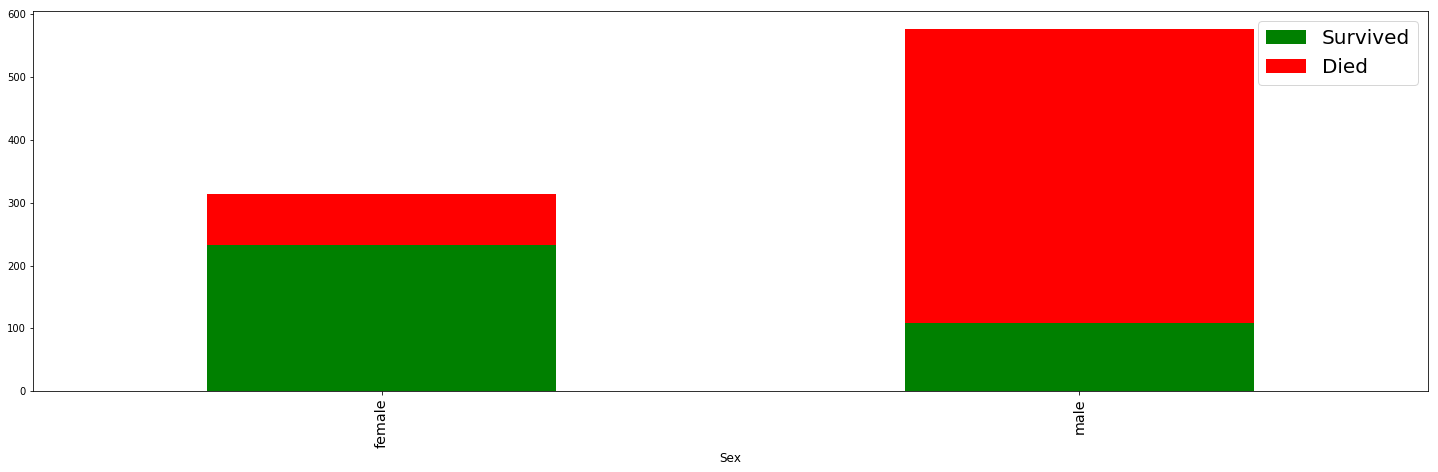

In [10]:
train_data.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(25,7),stacked=True, colors=['g','r']);

/home/lawrence/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


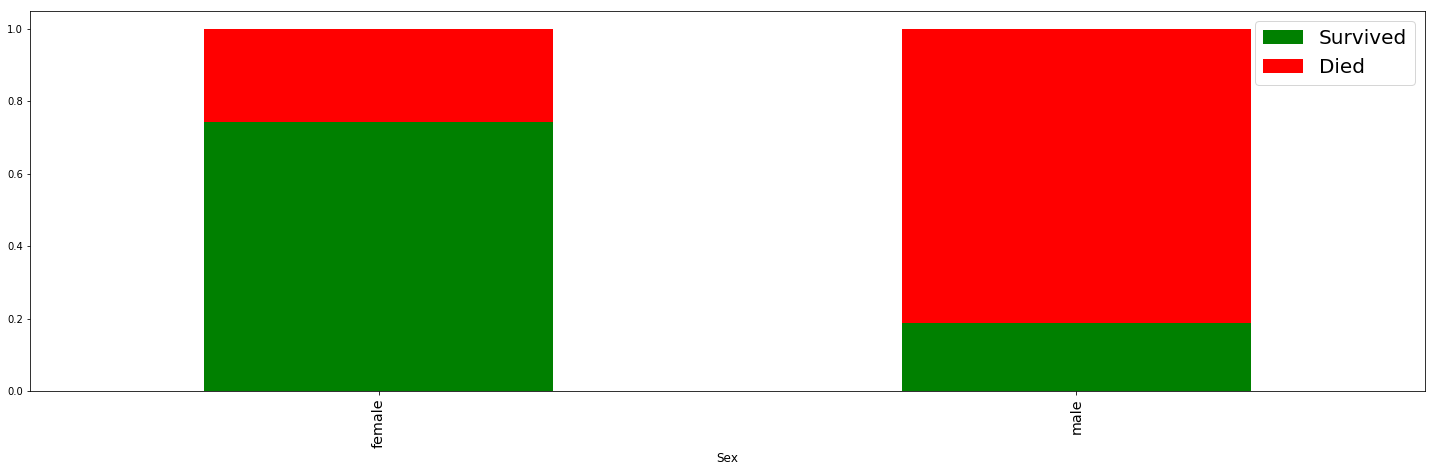

In [11]:
train_data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25,7), stacked=True, colors=['g','r'])

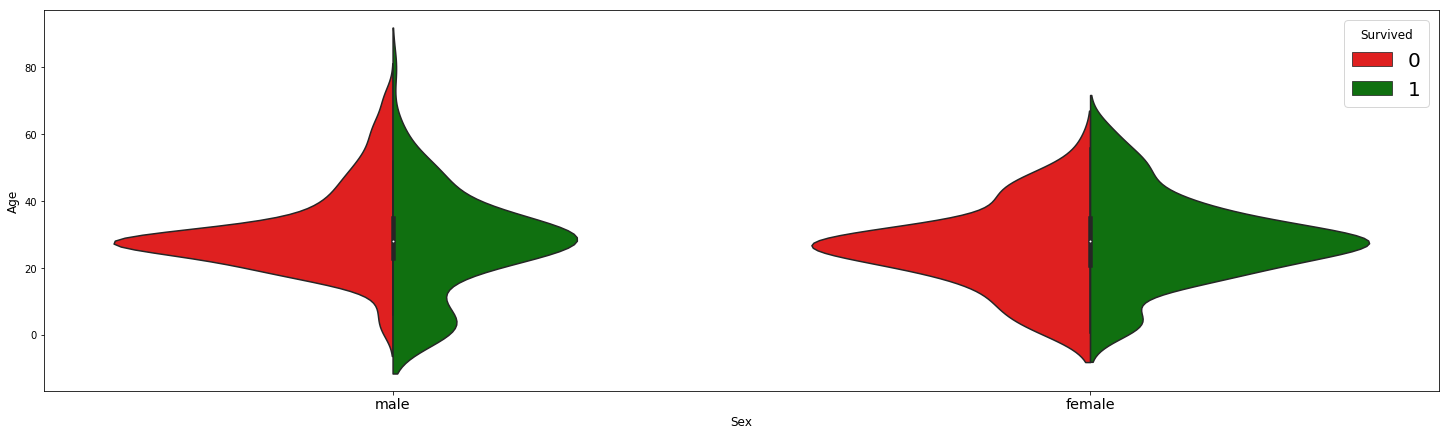

In [12]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age',
              hue='Survived', data=train_data,
              split=True, palette={0: "r", 1:"g"});

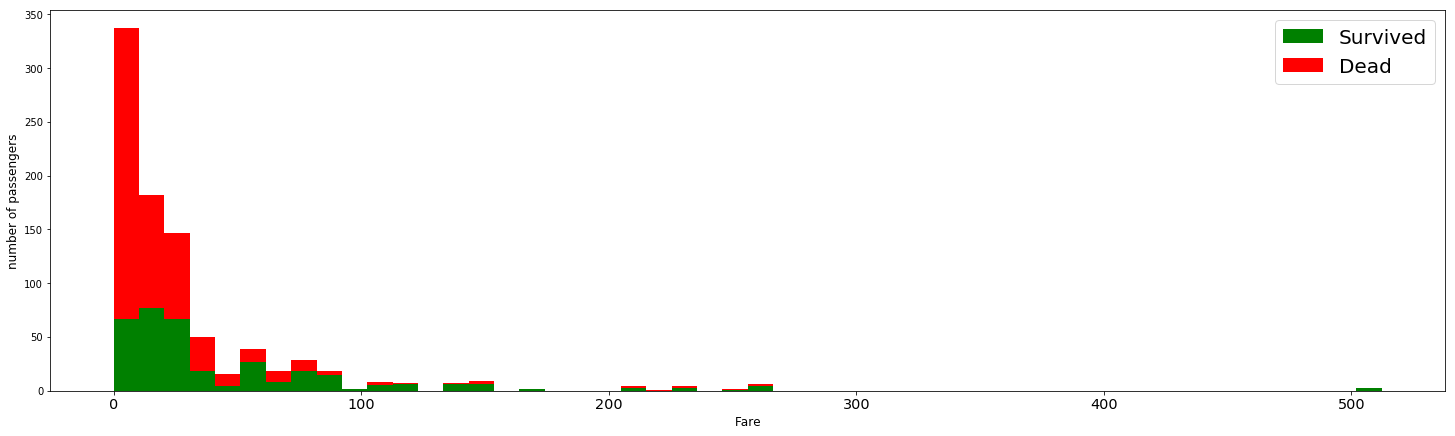

In [13]:
#considering the impact of fare ticket of each passenger on survival
figure = plt.figure(figsize=(25,7))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']],
        stacked=True, color=['g', 'r'],
         bins=50, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('number of passengers')
plt.legend();

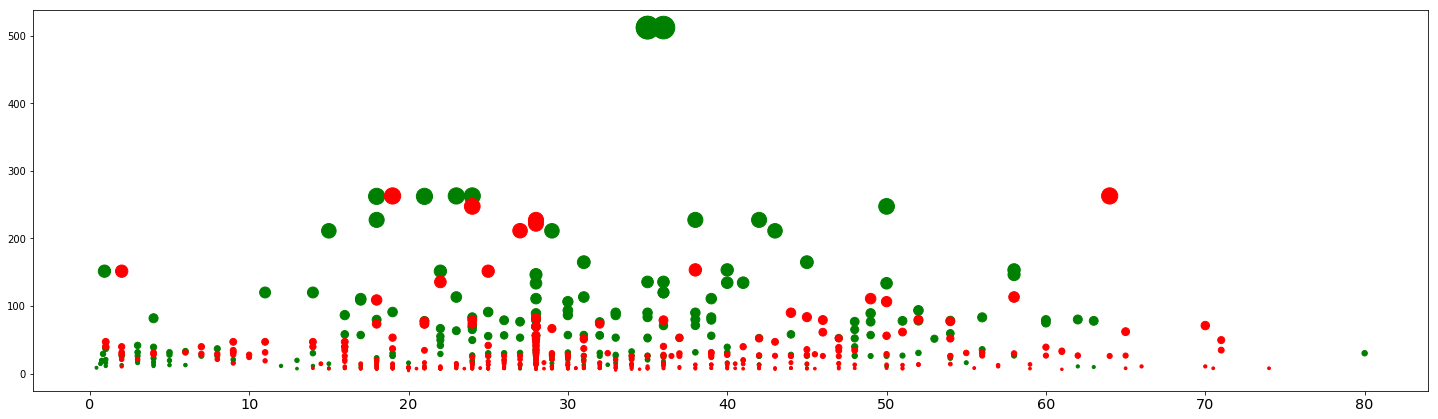

In [14]:
#Combining Age, the Fare and Survivial on a single chart
plt.figure(figsize=(25,7))
ax = plt.subplot()
ax.scatter(train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 1]['Fare'],
          c='green', s=train_data[train_data['Survived'] == 1]['Fare'])
ax.scatter(train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 0]['Fare'],
          c='red', s=train_data[train_data['Survived'] == 0]['Fare'])

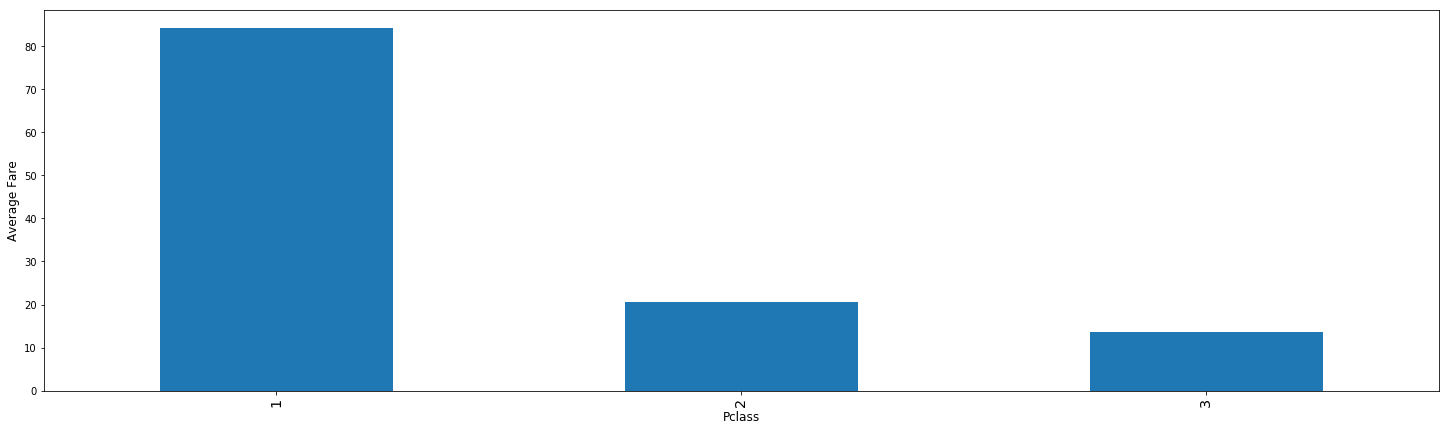

In [15]:
#Correlating ticket fare with Class
ax = plt.subplot()
ax.set_ylabel('Average Fare')
train_data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25,7), ax = ax)

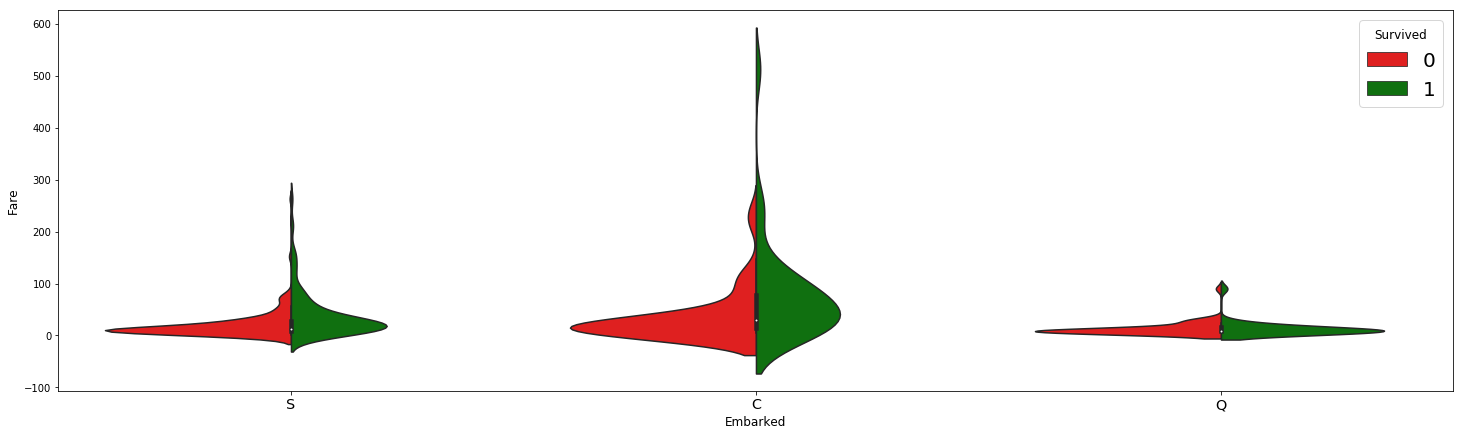

In [16]:
#Correlating Embarkation Site and Survival
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_data, split=True, palette={0: "r", 1: "g"})

In [17]:
#Feature Engineering

In [18]:
def status(feature):
    print('Processing', feature, ': Ok')

In [19]:
#Appending the training and test set 
def get_combined_data():
    #reading the data
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    
    #Extracting and then removing the targets from the training data
    target = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    
    #Merging train data and test data for future feature engineering
    #remove the passengerID since it is not an informative Feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace = True, axis=1)
    
    return combined

In [20]:
combined = get_combined_data()

In [21]:
combined.shape

(1309, 10)

In [22]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#Extracting the Passenger titles

#Different titles in the training data
titles = set()
for name in train_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [24]:
print(titles)

{'Ms', 'Jonkheer', 'Rev', 'Col', 'Capt', 'Don', 'Lady', 'Miss', 'Sir', 'Mr', 'Mme', 'Mlle', 'the Countess', 'Dr', 'Major', 'Mrs', 'Master'}


In [25]:
Title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "the Countess": "Royalty",
    "Lady": "Royalty",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Mrs": "Mrs",
    "Mlle": "Miss",
    "Miss": "Miss",
    "Mr": "Mr",
    "Master": "Master",
}
def get_titles():
        #Extract the titles from each name
        combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
        # A map of more aggregate title
        # Map each title
        combined['Title'] = combined.Title.map(Title_dictionary)
        status('Title')
        return combined

In [26]:
combined = get_titles()

Processing Title : Ok


In [27]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [29]:
# Number of missing ages in train set
combined.iloc[:891].Age.isnull().sum()

177

In [30]:
# Number of missing ages in test set
combined.iloc[891:].Age.isnull().sum()

86

In [31]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex','Pclass','Title','Age']]

In [32]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [33]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [34]:
combined = process_age()

Processing age : Ok


In [35]:
def process_names():
    global combined
    #We will drop the name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # Encoding in dummy Variable
    title_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, title_dummies], axis=1)
    
    # Removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [36]:
combined = process_names()

Processing names : Ok


In [37]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [38]:
#PROCESSING FARES
def process_fares():
    global combined
    # Replacing the missing fare value with the mean
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [39]:
combined = process_fares()

Processing fare : Ok


In [40]:
#PROCESSING EMBARKED
def process_embarked():
    global combined
    # Two missing Embarked values - filling them with the most frequent one in the train ste(S)
    combined.Embarked.fillna('S', inplace=True)
    # Dummy Encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined
    

In [41]:
combined = process_embarked()

Processing embarked : Ok


In [42]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [43]:
#PROCESSING CABIN
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [44]:
print(train_cabin)

{'G', 'D', 'B', 'F', 'C', 'A', 'E', 'T', 'U'}


In [45]:
print(test_cabin)

{'D', 'B', 'G', 'F', 'A', 'C', 'E', 'U'}


In [46]:
def process_cabin():
    global combined
    #Replacing missing cabins with U (for Unknown)
    combined.Cabin.fillna('U', inplace=True)
    
    #mapping each Cabin Value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    #dummy encoding....
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined
    

In [47]:
combined = process_cabin()

Processing cabin : Ok


In [48]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [49]:
#PROCESSING SEX
def process_sex():
    global combined
    #mapping string values to numerical one
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [50]:
combined = process_sex()

Processing Sex : Ok


In [51]:
#PROCESSING Pclass
def process_pclass():
    global combined
    # Encoding into 3 categories
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # Adding dummy variable
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    #removing Pclass
    combined.drop('Pclass', axis=1, inplace=True)
    
    status('Pclass')
    return combined

In [52]:
combined = process_pclass()

Processing Pclass : Ok


In [53]:
#PROCESSING TICKET
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(), ticket)
    ticket = list(filter(lambda t:not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [54]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [55]:
print(len(tickets))

37


In [72]:
def process_ticket():
    global combined
    # A function that extracts each prefix of the ticket, returns 'XXX' if no prefix(i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
    #Extracting dummmy variable from tickets
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    ticket_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, ticket_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combined

In [73]:
combined = process_ticket()

Processing Ticket : Ok


In [74]:
#PPROCESSING FAMILY
def process_family():
    global combined
    #Introducing a new feature: the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    #Introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s ==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<= s else 0)
    
    status('family')
    return combined


In [76]:
combined = process_family()

Processing family : Ok


In [77]:
print(combined.shape)

(1309, 67)


In [78]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


In [102]:
#MODELING
#Importing useful library
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [80]:
#Defining a small scoring function
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [84]:
#Recovering the train and test set from the combined dataset
def recover_train_target():
    global combined
    
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [85]:
train, test, targets = recover_train_target()

In [87]:
#Feature Selection
#Using Tree-based estimators to compute feature importance which in turn can be used to discard irrelevant features
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [89]:
#Looking at the importance
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

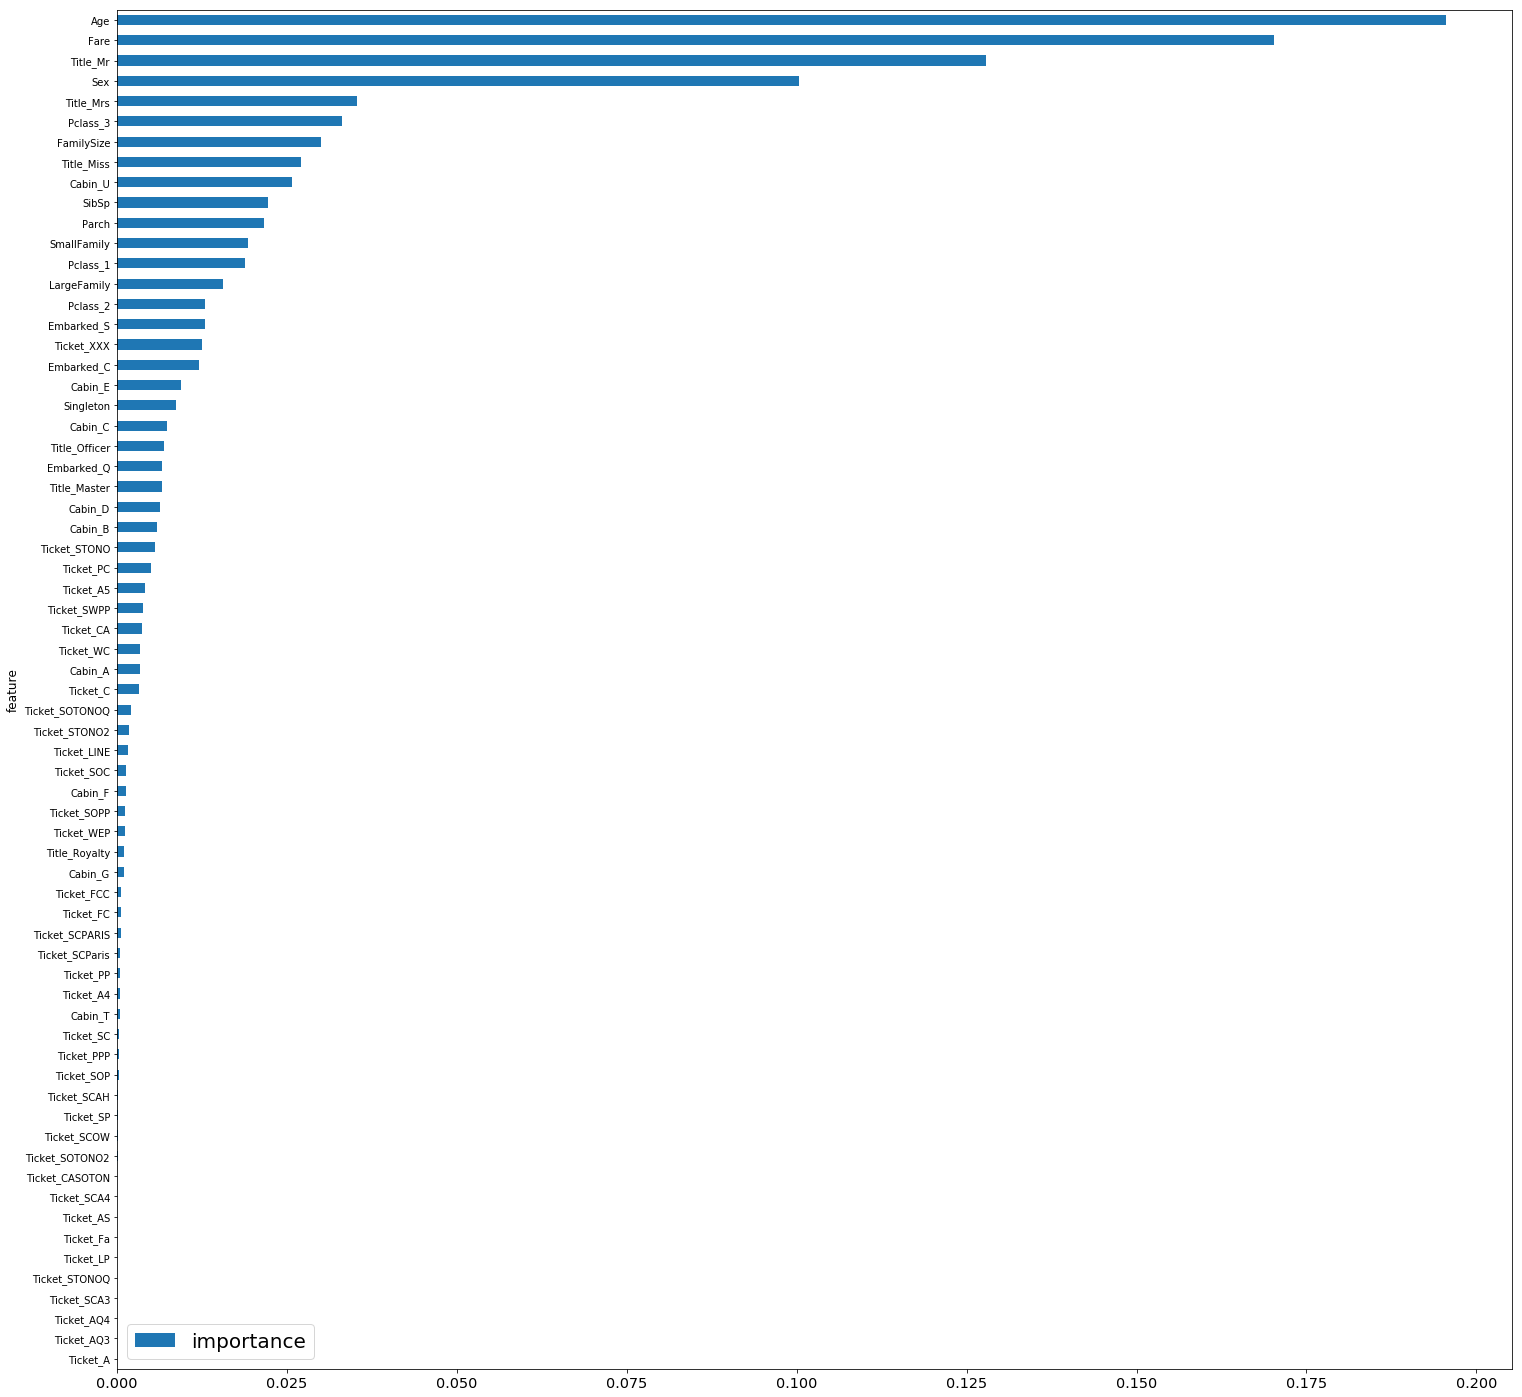

In [90]:
features.plot(kind='barh', figsize=(25,25))

In [93]:
#Transform our Train set and Test set in more compact dataset
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 14)


In [94]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 14)


In [103]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [106]:
for model in models:
    print('Corss-Validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Corss-Validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8125769783320514
****
Corss-Validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>


/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

CV score = 0.8215533300919537
****
Corss-Validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8070155653600786
****
Corss-Validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8249176976842577
****


In [109]:
#Hyperparameters Tuning
#Using Random Forest
#turn run_gs to True if you want to run the grid search again.
run_gs = False

if run_gs:
    parameter_grid = {
        'max_depth' : [4, 6, 8],
        'n_estimators' : [50, 10],
        'max_features' : ['sqrt', 'auto', 'log2'],
        'min_samples_leaf' : [1, 3, 10],
        'boostrap' : [True, False],
    }
    forest = RandomForestClassifier()
    cross_validation = stratifiedKFold(n_splits=5)
    
    grid_search = GridSearchCV(forest,
                              scoring = 'accuracy',
                              param_grid = parameter_grid,
                              cv = cross_validation,
                              verbose = 1
                              )
    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_
    
    print('Best Score: {}'.format(grid_search.best_score))
    print('Best parameters: {}'. format(grid_search.best_params_))
    
else:
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators':50,
                 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [111]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId', 'Survived']].to_csv('gridsearch_rf.csv', index=False)

In [113]:
trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = aux['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model

In [114]:
predictions_df.to_csv('sub2.csv', index=False)